# Part I. Unification of data files

In [1]:
# Import the necessary libraries
import os
import glob
import pandas as pd
import re
import shutil

In [2]:
# Create a dictionary with Polish names of moths and corresponding numbers
months = {
    'styczeń': '01',
    'luty': '02',
    'marzec': '03',
    'kwiecień': '04',
    'maj': '05',
    'czerwiec': '06',
    'lipiec': '07',
    'sierpień': '08',
    'wrzesień': '09',
    'październik': '10',
    'listopad': '11',
    'grudzień': '12'
}

In [3]:
# Create list of files in "all_files" folder
all_files = os.listdir('all_files')

# Then we create "list.txt" containing filenames
with open('filenames_list.txt', 'w') as file:
    file.write('\n'.join(all_files))

# Iterate through each file in "all_files"
for filename in all_files:
    # and change all names for lowercase
    new_filename = filename.lower()
    os.rename(os.path.join('all_files', filename), os.path.join('all_files', new_filename))

In [4]:
# All month names are converted to numbers
all_files = 'all_files'
for filename in os.listdir(all_files):
    file_path = os.path.join(all_files, filename)
    if os.path.isfile(file_path):
        file_name, file_ext = os.path.splitext(filename)
        for key in months:
            if key in file_name.lower():
                new_file_name = file_name.replace(key, months[key])
                new_file_name = new_file_name + file_ext
                new_file_path = os.path.join(all_files, new_file_name)
                os.rename(file_path, new_file_path)
                break

In [5]:
# All spaces " " are converted to "-"
for filename in os.listdir(all_files):
    file_path = os.path.join(all_files, filename)
    if os.path.isfile(file_path):
        new_filename = filename.replace(" ", "-")
        new_file_path = os.path.join(all_files, new_filename)
        if file_path != new_file_path:
            try:
                os.rename(file_path, new_file_path)
                print(f"Renamed file: {filename} -> {new_filename}")
            except FileExistsError:
                print(f"File named {new_filename} already exists. Skipping.")
        else:
            print(f"Filename {filename} doesn't require changes.")

Filename _analiza-rynku-maszyn-budowlanych-2024-08.xlsx doesn't require changes.
Filename .ds_store doesn't require changes.
Filename d&b-panel-sell-in-08-2009.xls doesn't require changes.
Filename _analiza-rynku-maszyn-budowlanych-2023-01.xlsx doesn't require changes.
Filename analiza-rynku-maszyn-budowlanych-09.2018.xlsx doesn't require changes.
Filename db-panel-sell-in-03-2016.xlsx doesn't require changes.
Filename analiza-rynku-maszyn-budowlanych-2019-08.xlsx doesn't require changes.
Filename _analiza-rynku-maszyn-budowlanych-2023-02.xlsx doesn't require changes.
Filename d&b-panel-sell-in-09-2010.xls doesn't require changes.
Filename _analiza-rynku-maszyn-budowlanych-2022-10.xlsx doesn't require changes.
Filename _analiza-rynku-maszyn-budowlanych-2023-05.xlsx doesn't require changes.
Filename d&b-panel-sell-in-06-2011.xls doesn't require changes.
Filename analiza-rynku-maszyn-budowlanych-2021-07.xlsx doesn't require changes.
Filename d&b-panel-sell-in-02-2010.xls doesn't require 

In [6]:
# Delete "analiza-rynku-maszyn-budowlanych-2018---" from file names

all_files = 'all_files'

for filename in os.listdir(all_files):
    file_path = os.path.join(all_files, filename)
    if os.path.isfile(file_path):
        if filename.startswith("analiza-rynku-maszyn-budowlanych-2018---"):
            new_filename = filename.replace("analiza-rynku-maszyn-budowlanych-2018---", "analiza-rynku-maszyn-budowlanych-")
            new_file_path = os.path.join(all_files, new_filename)
            try:
                os.rename(file_path, new_file_path)
                print(f"Renamed: {filename} -> {new_filename}")
            except FileExistsError:
                print(f"File {new_filename} already exists. Skipping.")

In [7]:
# Remove all other unnecessary characters from filenames

# path to "all_files" folder
folder_path = "all_files"

# If "new_files" doesn't exist,  we create it
new_folder_path = "new_files"
os.makedirs(new_folder_path, exist_ok=True)

# Loop iterating through files in the "all_files" folder
for filename in os.listdir(folder_path):
    old_file_path = os.path.join(folder_path, filename)
    
    if os.path.isfile(old_file_path):
        # we remove all characters from the file name that are not numbers,  "-" or "."
        new_filename = re.sub(r'[^\d\-.]', '', filename)
        
        if new_filename:
            
            # creating new file name
            new_filename = f"{new_filename}.xlsx"
            
            # creating path for the new file in "new_files" folder
            new_file_path = os.path.join(new_folder_path, new_filename)
            
            # Copying the original file to the "new_files" folder with a new name
            shutil.copy2(old_file_path, new_file_path)
            print(f"File {filename} copied as {new_filename}.")
        else:
            print(f"The {filename} file does not contain any numbers, '-' or '.' and will not be copied.")

print("The process of creating copies of files with only numbers, '-' and '.' in their names has been completed.")

File _analiza-rynku-maszyn-budowlanych-2024-08.xlsx copied as ----2024-08..xlsx.
File .ds_store copied as ..xlsx.
File d&b-panel-sell-in-08-2009.xls copied as ----08-2009..xlsx.
File _analiza-rynku-maszyn-budowlanych-2023-01.xlsx copied as ----2023-01..xlsx.
File analiza-rynku-maszyn-budowlanych-09.2018.xlsx copied as ----09.2018..xlsx.
File db-panel-sell-in-03-2016.xlsx copied as ----03-2016..xlsx.
File analiza-rynku-maszyn-budowlanych-2019-08.xlsx copied as ----2019-08..xlsx.
File _analiza-rynku-maszyn-budowlanych-2023-02.xlsx copied as ----2023-02..xlsx.
File d&b-panel-sell-in-09-2010.xls copied as ----09-2010..xlsx.
File _analiza-rynku-maszyn-budowlanych-2022-10.xlsx copied as ----2022-10..xlsx.
File _analiza-rynku-maszyn-budowlanych-2023-05.xlsx copied as ----2023-05..xlsx.
File d&b-panel-sell-in-06-2011.xls copied as ----06-2011..xlsx.
File analiza-rynku-maszyn-budowlanych-2021-07.xlsx copied as ----2021-07..xlsx.
File d&b-panel-sell-in-02-2010.xls copied as ----02-2010..xlsx.
Fi

In [8]:
# Standarize file names, taking into account the possibility of repeating file versions

# path to "new_files" folder
folder_path = "new_files"

# Loop iterating through files in the "new_files" folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    if os.path.isfile(file_path):
        # Finding a string of 4 digits in the file name and savig it in to the "year" variable
        match_year = re.search(r'\d{4}', filename)
        if match_year:
            year = match_year.group()
        else:
            continue
        
        # Finding a string of 2 digits with no other digits before or after them and storing them in the "month" variable
        match_month = re.search(r'(?<=\D)\d{2}(?=\D)', filename)
        if match_month:
            month = match_month.group()
        else:
            continue
        
        # Making new, unified file name
        new_filename = f"analiza_mb_{year}_{month}.xlsx"
        
        # Making path for new file in "new_files" folder
        new_file_path = os.path.join(folder_path, new_filename)
        
        # If a file with the new name already exists, skip the iteration
        if os.path.exists(new_file_path):
            print(f"A file named {new_filename} already exists. I skip the iteration.")
            continue
        
        # Changing the file name
        os.rename(file_path, new_file_path)
        print(f"Renamed {filename} to {new_filename}.")

print("The file renaming process is complete.")


Renamed ----2024-08..xlsx to analiza_mb_2024_08.xlsx.
Renamed ----08-2009..xlsx to analiza_mb_2009_08.xlsx.
Renamed ----2023-01..xlsx to analiza_mb_2023_01.xlsx.
Renamed ----09.2018..xlsx to analiza_mb_2018_09.xlsx.
Renamed ----03-2016..xlsx to analiza_mb_2016_03.xlsx.
Renamed ----2019-08..xlsx to analiza_mb_2019_08.xlsx.
Renamed ----2023-02..xlsx to analiza_mb_2023_02.xlsx.
Renamed ----09-2010..xlsx to analiza_mb_2010_09.xlsx.
Renamed ----2022-10..xlsx to analiza_mb_2022_10.xlsx.
Renamed ----2023-05..xlsx to analiza_mb_2023_05.xlsx.
Renamed ----06-2011..xlsx to analiza_mb_2011_06.xlsx.
Renamed ----2021-07..xlsx to analiza_mb_2021_07.xlsx.
Renamed ----02-2010..xlsx to analiza_mb_2010_02.xlsx.
Renamed ----08.-2018..xlsx to analiza_mb_2018_08.xlsx.
Renamed ----2019-12-3..xlsx to analiza_mb_2019_12.xlsx.
Renamed ----05-2014..xlsx to analiza_mb_2014_05.xlsx.
Renamed ----06.2018-..xlsx to analiza_mb_2018_06.xlsx.
Renamed ----10-2018..xlsx to analiza_mb_2018_10.xlsx.
Renamed ----2019-07-2..x

# Part II. DataFrame creation and preparing data

In [9]:
# function returning DataFrame object from MS Excell file

def create_new_df(filename, sheet):

    filepath = f'new_files/{filename}' 
    df = pd.read_excel(filepath, sheet_name=sheet, header=None)
    
    # Extracting the year and month from a file name
    parts = filename.split("_")
    year = parts[2]
    month = parts[3].split(".")[0]
    
    new_df = pd.DataFrame()

    for index in range(3, 19):        
        voivodeship = df.iloc[index, 0]
        
        # Searching for a row with "HYUNDAI" in column 0
        hyundai_rows = df[df[0].str.contains('HYUNDAI', case=False, na=False)].index

        
        # wheel excavators section        
        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found
            continue

        data = {
            'year': [year] * 5,
            'month': [month] * 5,
            'voivodeship': [voivodeship] * 5,
            'type': [df.iloc[0, 0]] * 5,
            'section': df.iloc[2, 1:6].values,
            'Hyundai': df.iloc[hyundai_row, 1:6].values,
            'quantity': df.iloc[index, 1:6].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

        # miniexcavator section

        # Searching for a row with "HYUNDAI" in column 8
        hyundai_rows = df[df[8].str.contains('HYUNDAI', case=False, na=False)].index

        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found
            continue
        
        data = {
            'year': [year] * 5,
            'month': [month] * 5,
            'voivodeship': [voivodeship] * 5,
            'type': [df.iloc[0, 8]] * 5,
            'section': df.iloc[2, 9:14].values,
            'Hyundai': df.iloc[hyundai_row, 9:14].values,
            'quantity': df.iloc[index, 9:14].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

        # midiexcavator section
        
        # Searching for a row with "HYUNDAI" in column 16
        hyundai_rows = df[df[16].str.contains('HYUNDAI', case=False, na=False)].index

        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found
            continue
        
        
        data = {
            'year': [year] * 7,
            'month': [month] * 7,
            'voivodeship': [voivodeship] * 7,
            'type': [df.iloc[0, 16]] * 7,
            'section': df.iloc[2, 17:24].values,
            'Hyundai': df.iloc[hyundai_row, 17:24].values,
            'quantity': df.iloc[index, 17:24].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

        # Searching for a row with "HYUNDAI" in column 26
        hyundai_rows = df[df[26].str.contains('HYUNDAI', case=False, na=False)].index

        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found
            continue

        
        # crawler section
        data = {
            'year': [year] * 7,
            'month': [month] * 7,
            'voivodeship': [voivodeship] * 7,
            'type': [df.iloc[0, 26]] * 7,
            'section': df.iloc[2, 27:34].values,
            'Hyundai': df.iloc[hyundai_row, 27:34].values,
            'quantity': df.iloc[index, 27:34].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

        # loader section
        
        # Searching for a row with "HYUNDAI" in column 46
        hyundai_rows = df[df[46].str.contains('HYUNDAI', case=False, na=False)].index

        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found 
            continue

        
        data = {
            'year': [year] * 6,
            'month': [month] * 6,
            'voivodeship': [voivodeship] * 6,
            'type': [df.iloc[0, 46]] * 6,
            'section': df.iloc[2, 47:53].values,
            'Hyundai': df.iloc[hyundai_row, 47:53].values,
            'quantity': df.iloc[index, 47:53].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

    return new_df

# # example/test data
sheet = 'sell-in-06'
filename = 'analiza_mb_2022_06.xlsx'

# Creating new DataFrame
result_df = create_new_df(filename, sheet)
print(result_df)


    year month         voivodeship                        type       section  \
0   2022    06        DOLNOŚLĄSKIE              KOPARKI KOŁOWE        < 13 T   
1   2022    06        DOLNOŚLĄSKIE              KOPARKI KOŁOWE     13 < 15 T   
2   2022    06        DOLNOŚLĄSKIE              KOPARKI KOŁOWE     15 < 17 T   
3   2022    06        DOLNOŚLĄSKIE              KOPARKI KOŁOWE     17 < 20 T   
4   2022    06        DOLNOŚLĄSKIE              KOPARKI KOŁOWE        > 20 T   
..   ...   ...                 ...                         ...           ...   
1   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)  175 < 200 KM   
2   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)  200 < 250 KM   
3   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)  250 < 300 KM   
4   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)  300 < 350 KM   
5   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)      > 350 KM   

                Hyundai quantity  
0   

In [10]:
# Framer function with built-in create_new_df function
def framer(year, month):
    Months = {
        '01': 'Styczeń',
        '02': 'Luty',
        '03': 'Marzec',
        '04': 'Kwiecień',
        '05': 'Maj',
        '06': 'Czerwiec',
        '07': 'Lipiec',
        '08': 'Sierpień',
        '09': 'Wrzesień',
        '10': 'Październik',
        '11': 'Listopad',
        '12': 'Grudzień'
    }
    
    # Creating new file name
    filename = f"analiza_mb_{year}_{month}.xlsx"
    file_path = os.path.join("new_files", filename)
    
    # Checking if file exists
    if not os.path.exists(file_path):
        print(f"File {filename} does not exist")
        return
    
    # changing the number to the Polish name of the month
    month_name = Months.get(month)
    
    if month_name is None:
        print(f"Invalid month number: {month}.") 
        return
    
    # looking for a sheet
    found_sheet = False
    try:
        # df = pd.read_excel(file_path, sheet_name=month)
        print(f"1 - {sheet} {month} tab found in file {filename} with data {year}, {month_name}.") #
        return(sheet, filename, year)
        found_sheet = True
    except:
        pass
    
    if not found_sheet:
        month_key = None
        for key, value in Months.items():
            if value == month_name:
                month_key = key
                break
        
        if month_key:
            try:
                df = pd.read_excel(file_path, sheet_name=month_key)
                print(f"2 - Found {month_key} tab (key {month_name}) in file {filename} with data {year}, {month_name}.")
                sheet_name = sheet
                result_df = create_new_df(filename, sheet)
                # print(result_df)
                return(result_df)
                
            except:
                try:
                    df = pd.read_excel(file_path, sheet_name=month_name)
                    print(f"3 - Tab {month_name} (key {month_key}) found in file {filename} with data {year}, {month_name}.")
                    sheet_name = sheet
                    # return(sheet, filename) 
                    # Creating new DataFrame
                    result_df = create_new_df(filename, sheet)
                    # print(result_df)
                    return(result_df)
                    
                except:
                    found_custom_sheet = False
                    for sheet in pd.ExcelFile(file_path).sheet_names:
                        if month in sheet or month_name in sheet:
                            print(f"4 - A {sheet} sheet containing {month} or {month_name} was found in the {filename} file with {year}, {month_name} data.")
                            print(sheet, filename)
                            # Creating new DataFrame
                            result_df = create_new_df(filename, sheet)
                            # print(result_df)
                            return(result_df)
                            found_custom_sheet = True

                    if not found_custom_sheet:
                        print(f"The {year}, {month_name} data tab was not found in the {filename} file.")
                        
# framer(2009, "04")  



In [11]:
# Function that iterates through files and returns a complete dataframe
def iterator():
    folder_path = "new_files"
    
    complete_mb_dataframe = pd.DataFrame()  # Empty DataFrame initialization
    
    for filename in os.listdir(folder_path):
        if filename.startswith("analiza_mb_") and filename.endswith(".xlsx"):
            file_path = os.path.join(folder_path, filename)
            
            # Extracting the year and month from a file name
            parts = filename.split("_")
            year = parts[2]
            month = parts[3].split(".")[0]
            
            print(f"Processing file: {filename}")
            try:
                framer_result = framer(year, month)
                
                if framer_result is not None and isinstance(framer_result, pd.DataFrame):
                    complete_mb_dataframe = pd.concat([complete_mb_dataframe, framer_result], ignore_index=True)
                    
            except Exception as e:
                print(f"Error processing file {filename}: {str(e)}")
                
            print("=" * 50)
                
    print("Complete DataFrame - Top 5 rows:")
    print(complete_mb_dataframe.head())
    
    print("Complete DataFrame - Bottom 5 rows:")
    print(complete_mb_dataframe.tail())
    
    # Save result DataFrame to Excel
    excel_filename = "complete_mb_data.xlsx"
    complete_mb_dataframe.to_excel(excel_filename, index=False)
    print(f"Saved the resulting DataFrame to an Excel file: {excel_filename}")
    
    return complete_mb_dataframe

# Calling iterator function
complete_df = iterator()


Processing file: analiza_mb_2024_08.xlsx
4 - A sell-in-08 sheet containing 08 or Sierpień was found in the analiza_mb_2024_08.xlsx file with 2024, Sierpień data.
sell-in-08 analiza_mb_2024_08.xlsx
Processing file: analiza_mb_2009_08.xlsx
4 - A D&B Panel Sell-in- Sierpień sheet containing 08 or Sierpień was found in the analiza_mb_2009_08.xlsx file with 2009, Sierpień data.
D&B Panel Sell-in- Sierpień analiza_mb_2009_08.xlsx
Processing file: analiza_mb_2023_01.xlsx
4 - A sell-in-01 sheet containing 01 or Styczeń was found in the analiza_mb_2023_01.xlsx file with 2023, Styczeń data.
sell-in-01 analiza_mb_2023_01.xlsx
Processing file: analiza_mb_2018_09.xlsx
4 - A Sell-in- Wrzesień sheet containing 09 or Wrzesień was found in the analiza_mb_2018_09.xlsx file with 2018, Wrzesień data.
Sell-in- Wrzesień analiza_mb_2018_09.xlsx
Processing file: analiza_mb_2016_03.xlsx
4 - A D&B Panel Sell-in- Marzec sheet containing 03 or Marzec was found in the analiza_mb_2016_03.xlsx file with 2016, Marzec

# Part III. EDA

In [12]:
# Loading useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## Data summary:

In [13]:
# Display the first few rows of the complete dataframe
complete_df = pd.read_excel("complete_mb_data.xlsx")
complete_df.head()

,year,month,voivodeship,type,section,Hyundai,quantity
0,2024,8,DOLNOŚLĄSKIE,KOPARKI KOŁOWE,< 13 T,R55W-9A/ HW65AH/ HW100A,0.0
1,2024,8,DOLNOŚLĄSKIE,KOPARKI KOŁOWE,13 < 15 T,HW140A,0.0
2,2024,8,DOLNOŚLĄSKIE,KOPARKI KOŁOWE,15 < 17 T,HW150ACR/ HW160A,0.0
3,2024,8,DOLNOŚLĄSKIE,KOPARKI KOŁOWE,17 < 20 T,HW170ACR/ HW180,2.0
4,2024,8,DOLNOŚLĄSKIE,KOPARKI KOŁOWE,> 20 T,HW210A,0.0


In [14]:
# Display the last 5 rows of the dataframe
complete_df.tail()

,year,month,voivodeship,type,section,Hyundai,quantity
87835,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),175 < 200 KM,HL955A,0.0
87836,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),200 < 250 KM,HL960A,1.0
87837,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),250 < 300 KM,NaN,0.0
87838,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),300 < 350 KM,HL970A / HL975A CVT,0.0
87839,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),> 350 KM,HL980A,0.0


In [15]:
# Display information about the complete_df DataFrame, including the index dtype and column dtypes, non-null values, and memory usage
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         87840 non-null  int64  
 1   month        87840 non-null  int64  
 2   voivodeship  87840 non-null  object 
 3   type         87840 non-null  object 
 4   section      87840 non-null  object 
 5   Hyundai      71328 non-null  object 
 6   quantity     78710 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 4.7+ MB


In [16]:
# Display descriptive statistics of the complete_df DataFrame
complete_df.describe()

,year,month,quantity
count,87840.000000,87840.000000,78710.000000
mean,2016.420765,6.442623,0.350387
std,4.535617,3.449220,1.128189
min,2009.000000,1.000000,-1.000000
25%,2012.000000,3.000000,0.000000
50%,2016.000000,6.000000,0.000000
75%,2020.000000,9.000000,0.000000
max,2024.000000,12.000000,34.000000


In [17]:
# Check the shape of the complete_df dataframe
complete_df.shape

(87840, 7)

## Data cleaning

Text(0, 0.5, 'Sample Number')

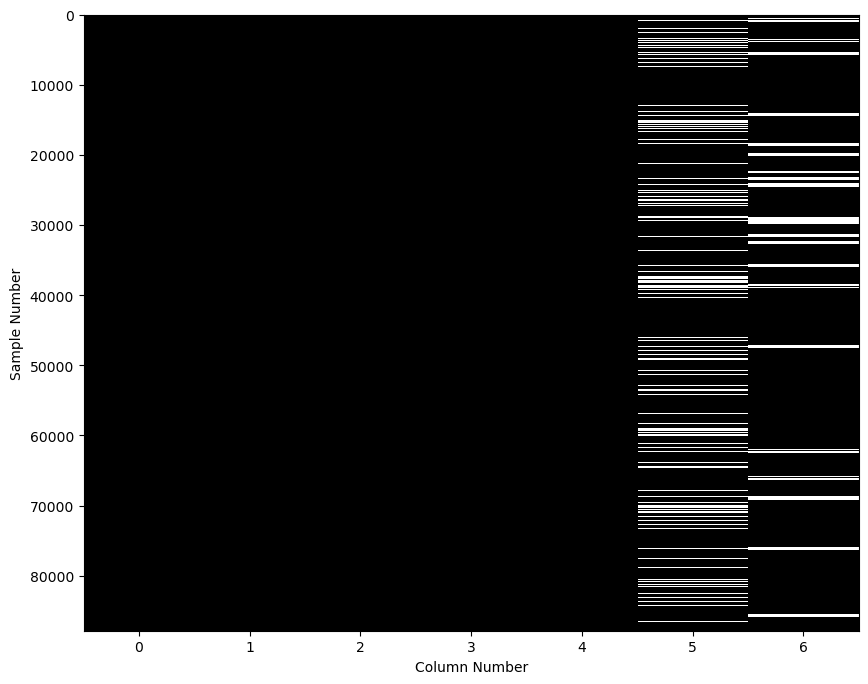

In [18]:
plt.figure(figsize=(10,8))
plt.imshow(complete_df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

<Axes: title={'center': 'Percantage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

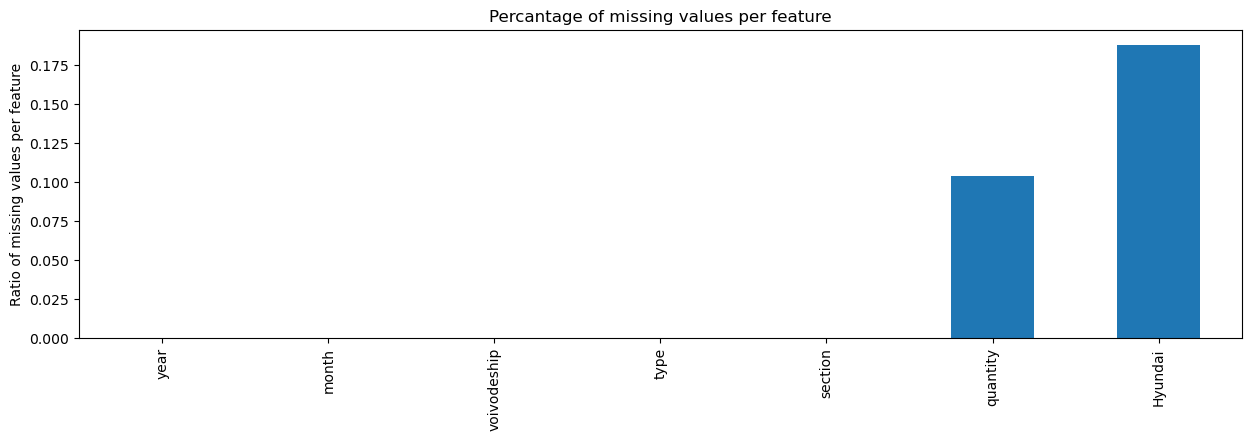

In [19]:
complete_df.isna().mean().sort_values().plot(kind="bar", figsize=(15,4), title="Percantage of missing values per feature", ylabel="Ratio of missing values per feature")

In [20]:
# Identify columns with missing values
columns_with_missing = complete_df.columns[complete_df.isnull().any()].tolist()

# Choose columns for imputation
columns_to_impute = ['quantity']

# Convert columns to numeric type if needed
complete_df[columns_to_impute] = complete_df[columns_to_impute].apply(pd.to_numeric, errors='coerce')

# Create an instance of the SimpleImputer for categorical data
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Perform imputation on the selected columns
complete_df[columns_to_impute] = imputer_categorical.fit_transform(complete_df[columns_to_impute])

# Print the DataFrame after imputation
print(complete_df)

       year  month         voivodeship                        type  \
0      2024      8        DOLNOŚLĄSKIE              KOPARKI KOŁOWE   
1      2024      8        DOLNOŚLĄSKIE              KOPARKI KOŁOWE   
2      2024      8        DOLNOŚLĄSKIE              KOPARKI KOŁOWE   
3      2024      8        DOLNOŚLĄSKIE              KOPARKI KOŁOWE   
4      2024      8        DOLNOŚLĄSKIE              KOPARKI KOŁOWE   
...     ...    ...                 ...                         ...   
87835  2024     10  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   
87836  2024     10  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   
87837  2024     10  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   
87838  2024     10  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   
87839  2024     10  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   

            section                   Hyundai  quantity  
0            < 13 T   R55W-9A/ HW65AH/ HW100A       0.0  
1         13 < 15 T                    HW14

Text(0, 0.5, 'Sample Number')

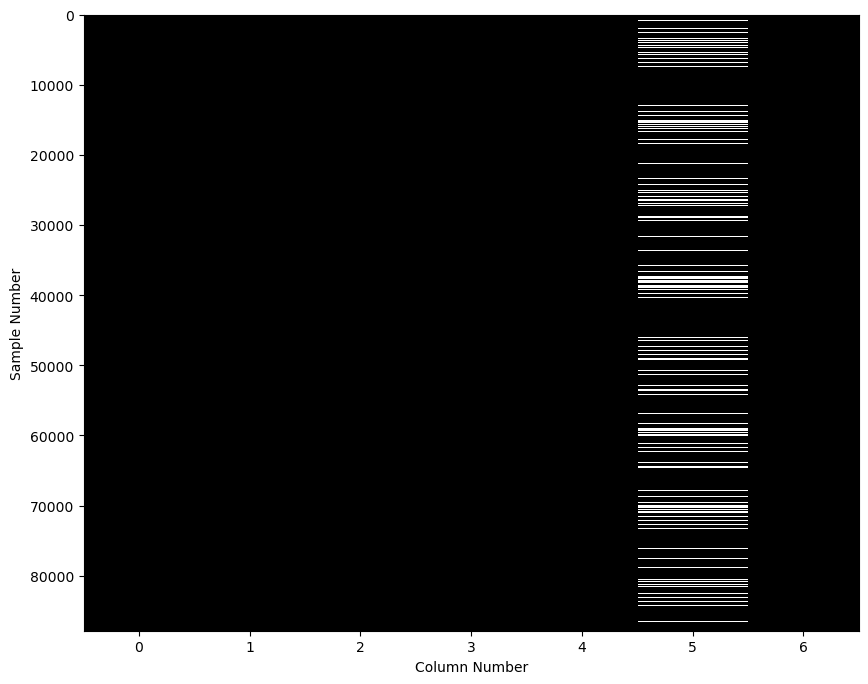

In [21]:
plt.figure(figsize=(10,8))
plt.imshow(complete_df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [22]:
# Fill missing values in the 'Hyundai' column

complete_df['Hyundai'].fillna('Other', inplace=True)

C:\Users\d.rajczak\AppData\Local\Temp\ipykernel_4020\3695838984.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  complete_df['Hyundai'].fillna('Other', inplace=True)


Text(0, 0.5, 'Sample Number')

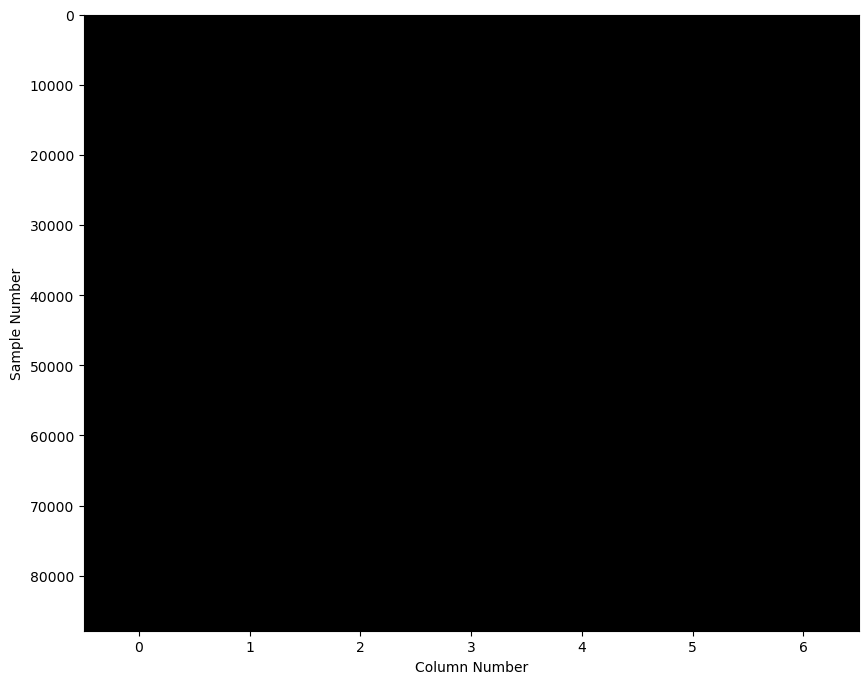

In [23]:
# Looking if there are any missing values left

plt.figure(figsize=(10,8))
plt.imshow(complete_df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [24]:
# Look for unique categorical values to inspect data concistancy

for type_group, group_df in complete_df.groupby('type'):
    # Print the unique values in the 'section' column for the current 'type'
    unique_sections = group_df['section'].unique()
    print(f"Type: {type_group}\nUnique Sections: {unique_sections}\n")

Type: KOPARKI GĄSIENICOWE
Unique Sections: ['28 < 33 T' '33 < 40 T' '40 < 50 T' '50 < 66 T' '66 < 90 T' '90 < 150 T'
 '> 150 T' '33 < 4 T' '4 < 5 T' '5 < 66 T' '66 < 9 T' '9 < 15 T' '> 15 T']

Type: KOPARKI KOŁOWE
Unique Sections: ['< 13 T' '13 < 15 T' '15 < 17 T' '17 < 20 T' '> 20 T' '17 < 2 T' '> 2 T']

Type: MAŁE I ŚREDNIE KOPARKI GĄSIENICOWE
Unique Sections: ['6 < 8T' '8 < 12 T' '12 < 14 T' '14 < 19  T' '19 < 21 T' '21 < 24 T'
 '24 < 28 T']

Type: MINI-KOPARKI GĄSIENICOWE
Unique Sections: ['0 < 1 T' '1 < 2 T' '2 < 3 T' '3 < 4 T' '4 T < ' ' < 1 T']

Type: ŁADOWARKI KOŁOWE  (>150KM)
Unique Sections: ['150 < 175 KM' '175 < 200 KM' '200 < 250 KM' '250 < 300 KM'
 '300 < 350 KM' '> 350 KM' '14-16 T' '16-19 T' '19-22 T' '22 - 25 T'
 '25-40 T' '>40 T']

Type: ŁADOWARKI KOŁOWE  (>15KM)
Unique Sections: ['15 < 175 KM' '175 < 2 KM' '2 < 25 KM' '25 < 3 KM' '3 < 35 KM' '> 35 KM']



In [25]:
# Make corrections to section column based on specified conditions
corrections = {
    'KOPARKI GĄSIENICOWE': {
        '33 < 4 T': '33 < 40 T',
        '4 < 5 T': '40 < 50 T',
        '5 < 66 T': '50 < 66 T',
        '66 < 9 T': '66 < 90 T',
        '9 < 15 T': '90 < 150 T',
        '> 15 T': '> 150 T'
    },
    'KOPARKI KOŁOWE': {
        '17 < 2 T': '17 < 20 T',
        '> 2 T': '> 20 T'
    },
    'ŁADOWARKI KOŁOWE  (>150KM)': {
        '14-16 T': '150 < 175 KM',
        '16-19 T': '175 < 200 KM',
        '19-22 T': '200 < 250 KM',
        '22 - 25 T': '250 < 300 KM',
        '25-40 T': '300 < 350 KM',
        '>40 T': '> 350 KM'
    },
    'ŁADOWARKI KOŁOWE  (>15KM)': {
        '15 < 175 KM': '150 < 175 KM',
        '175 < 2 KM': '175 < 200 KM',
        '2 < 25 KM': '200 < 250 KM',
        '25 < 3 KM': '250 < 300 KM',
        '3 < 35 KM': '300 < 350 KM',
        '> 35 KM': '> 350 KM'
    }
}

# Apply the corrections to the dataframe
for type, corrections_dict in corrections.items():
    mask = complete_df['type'] == type
    for old_value, new_value in corrections_dict.items():
        complete_df.loc[mask & (complete_df['section'] == old_value), 'section'] = new_value

# Change type from ŁADOWARKI KOŁOWE  (>15KM) to ŁADOWARKI KOŁOWE  (>150KM)
complete_df['type'] = complete_df['type'].str.replace('ŁADOWARKI KOŁOWE  (>15KM)', 'ŁADOWARKI KOŁOWE  (>150KM)')

In [26]:
# Look again for unique categorical values to inspect data concistancy

for type_group, group_df in complete_df.groupby('type'):
    # Print the unique values in the 'section' column for the current 'type'
    unique_sections = group_df['section'].unique()
    print(f"Type: {type_group}\nUnique Sections: {unique_sections}\n")

Type: KOPARKI GĄSIENICOWE
Unique Sections: ['28 < 33 T' '33 < 40 T' '40 < 50 T' '50 < 66 T' '66 < 90 T' '90 < 150 T'
 '> 150 T']

Type: KOPARKI KOŁOWE
Unique Sections: ['< 13 T' '13 < 15 T' '15 < 17 T' '17 < 20 T' '> 20 T']

Type: MAŁE I ŚREDNIE KOPARKI GĄSIENICOWE
Unique Sections: ['6 < 8T' '8 < 12 T' '12 < 14 T' '14 < 19  T' '19 < 21 T' '21 < 24 T'
 '24 < 28 T']

Type: MINI-KOPARKI GĄSIENICOWE
Unique Sections: ['0 < 1 T' '1 < 2 T' '2 < 3 T' '3 < 4 T' '4 T < ' ' < 1 T']

Type: ŁADOWARKI KOŁOWE  (>150KM)
Unique Sections: ['150 < 175 KM' '175 < 200 KM' '200 < 250 KM' '250 < 300 KM'
 '300 < 350 KM' '> 350 KM']



In [27]:
complete_df.tail()

,year,month,voivodeship,type,section,Hyundai,quantity
87835,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),175 < 200 KM,HL955A,0.0
87836,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),200 < 250 KM,HL960A,1.0
87837,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),250 < 300 KM,Other,0.0
87838,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),300 < 350 KM,HL970A / HL975A CVT,0.0
87839,2024,10,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),> 350 KM,HL980A,0.0


In [28]:
complete_df = complete_df.sort_values(by=['year', 'month', 'voivodeship', 'type', 'section'])
complete_df.tail()

,year,month,voivodeship,type,section,Hyundai,quantity
87745,2024,10,ŚWIĘTOKRZYSKIE,ŁADOWARKI KOŁOWE (>150KM),175 < 200 KM,HL955A,0.0
87746,2024,10,ŚWIĘTOKRZYSKIE,ŁADOWARKI KOŁOWE (>150KM),200 < 250 KM,HL960A,0.0
87747,2024,10,ŚWIĘTOKRZYSKIE,ŁADOWARKI KOŁOWE (>150KM),250 < 300 KM,Other,0.0
87748,2024,10,ŚWIĘTOKRZYSKIE,ŁADOWARKI KOŁOWE (>150KM),300 < 350 KM,HL970A / HL975A CVT,0.0
87749,2024,10,ŚWIĘTOKRZYSKIE,ŁADOWARKI KOŁOWE (>150KM),> 350 KM,HL980A,0.0


In [29]:
# Save DataFrame to Excell as backup

excell_filename = "clean_df.xlsx"

complete_df.to_excel(excell_filename, index=False)
print(f"Saved cleaned DataFrame to an Excel file: {excell_filename}")

Saved cleaned DataFrame to an Excel file: clean_df.xlsx


# Part IV. DATA VISUALISATION

In [30]:
import pandas as pd

# Loading complete_df exell file as data frame

df = pd.read_excel('clean_df.xlsx')

# Create separate dataframes for each unique value in the 'type' column as requested

kolowe_df = df[df['type'] == 'KOPARKI KOŁOWE']
gasinicowe_df = df[df['type'] == 'KOPARKI GĄSIENICOWE']
midi_df = df[df['type'] == 'MAŁE I ŚREDNIE KOPARKI GĄSIENICOWE']
mini_df = df[df['type'] == 'MINI-KOPARKI GĄSIENICOWE']
ladowarki_df = df[df['type'] == 'ŁADOWARKI KOŁOWE  (>150KM)']

# Verify the creation by showing the first few rows of each dataframe
(kolowe_df.head(), gasinicowe_df.head(), midi_df.head(), mini_df.head(), ladowarki_df.head())


(    year  month   voivodeship            type    section   Hyundai  quantity
 7   2009      2  DOLNOŚLĄSKIE  KOPARKI KOŁOWE  13 < 15 T  R 140W-7         0
 8   2009      2  DOLNOŚLĄSKIE  KOPARKI KOŁOWE  15 < 17 T  R 170W-7         0
 9   2009      2  DOLNOŚLĄSKIE  KOPARKI KOŁOWE  17 < 20 T  R 200W-7         0
 10  2009      2  DOLNOŚLĄSKIE  KOPARKI KOŁOWE     < 13 T   R 55W-7         0
 11  2009      2  DOLNOŚLĄSKIE  KOPARKI KOŁOWE     > 20 T     Other         1,
    year  month   voivodeship                 type    section  \
 0  2009      2  DOLNOŚLĄSKIE  KOPARKI GĄSIENICOWE  28 < 33 T   
 1  2009      2  DOLNOŚLĄSKIE  KOPARKI GĄSIENICOWE  33 < 40 T   
 2  2009      2  DOLNOŚLĄSKIE  KOPARKI GĄSIENICOWE  40 < 50 T   
 3  2009      2  DOLNOŚLĄSKIE  KOPARKI GĄSIENICOWE  50 < 66 T   
 4  2009      2  DOLNOŚLĄSKIE  KOPARKI GĄSIENICOWE  66 < 90 T   
 
                                              Hyundai  quantity  
 0  R 290LC-7\n R 290NLC-7\n R 290LC-7HC\n R 290LC...         0  
 1     

In [31]:
# Calculating the most frequent section in each month and calculating the average quantity per month per unique 'year' value for each 'section'

kolowe_monthly = kolowe_df.groupby(['month', 'section']).agg(
    total_quantity=('quantity', 'sum'),
    unique_years=('year', lambda x: x.nunique())
).reset_index()

# Calculate the average quantity per month per unique 'year' value for each 'section'
kolowe_monthly['average_quantity'] = kolowe_monthly['total_quantity'] / kolowe_monthly['unique_years']

# Find the section with the highest average quantity per month
most_frequent_section_per_month = kolowe_monthly.loc[kolowe_monthly.groupby('month')['average_quantity'].idxmax()]

most_frequent_section_per_month


,month,section,total_quantity,unique_years,average_quantity
2,1,17 < 20 T,61,15,4.066667
6,2,15 < 17 T,74,16,4.625000
11,3,15 < 17 T,128,16,8.000000
16,4,15 < 17 T,106,16,6.625000
21,5,15 < 17 T,118,15,7.866667
26,6,15 < 17 T,112,14,8.000000
31,7,15 < 17 T,134,16,8.375000
36,8,15 < 17 T,129,15,8.600000
41,9,15 < 17 T,115,16,7.187500
46,10,15 < 17 T,129,14,9.214286


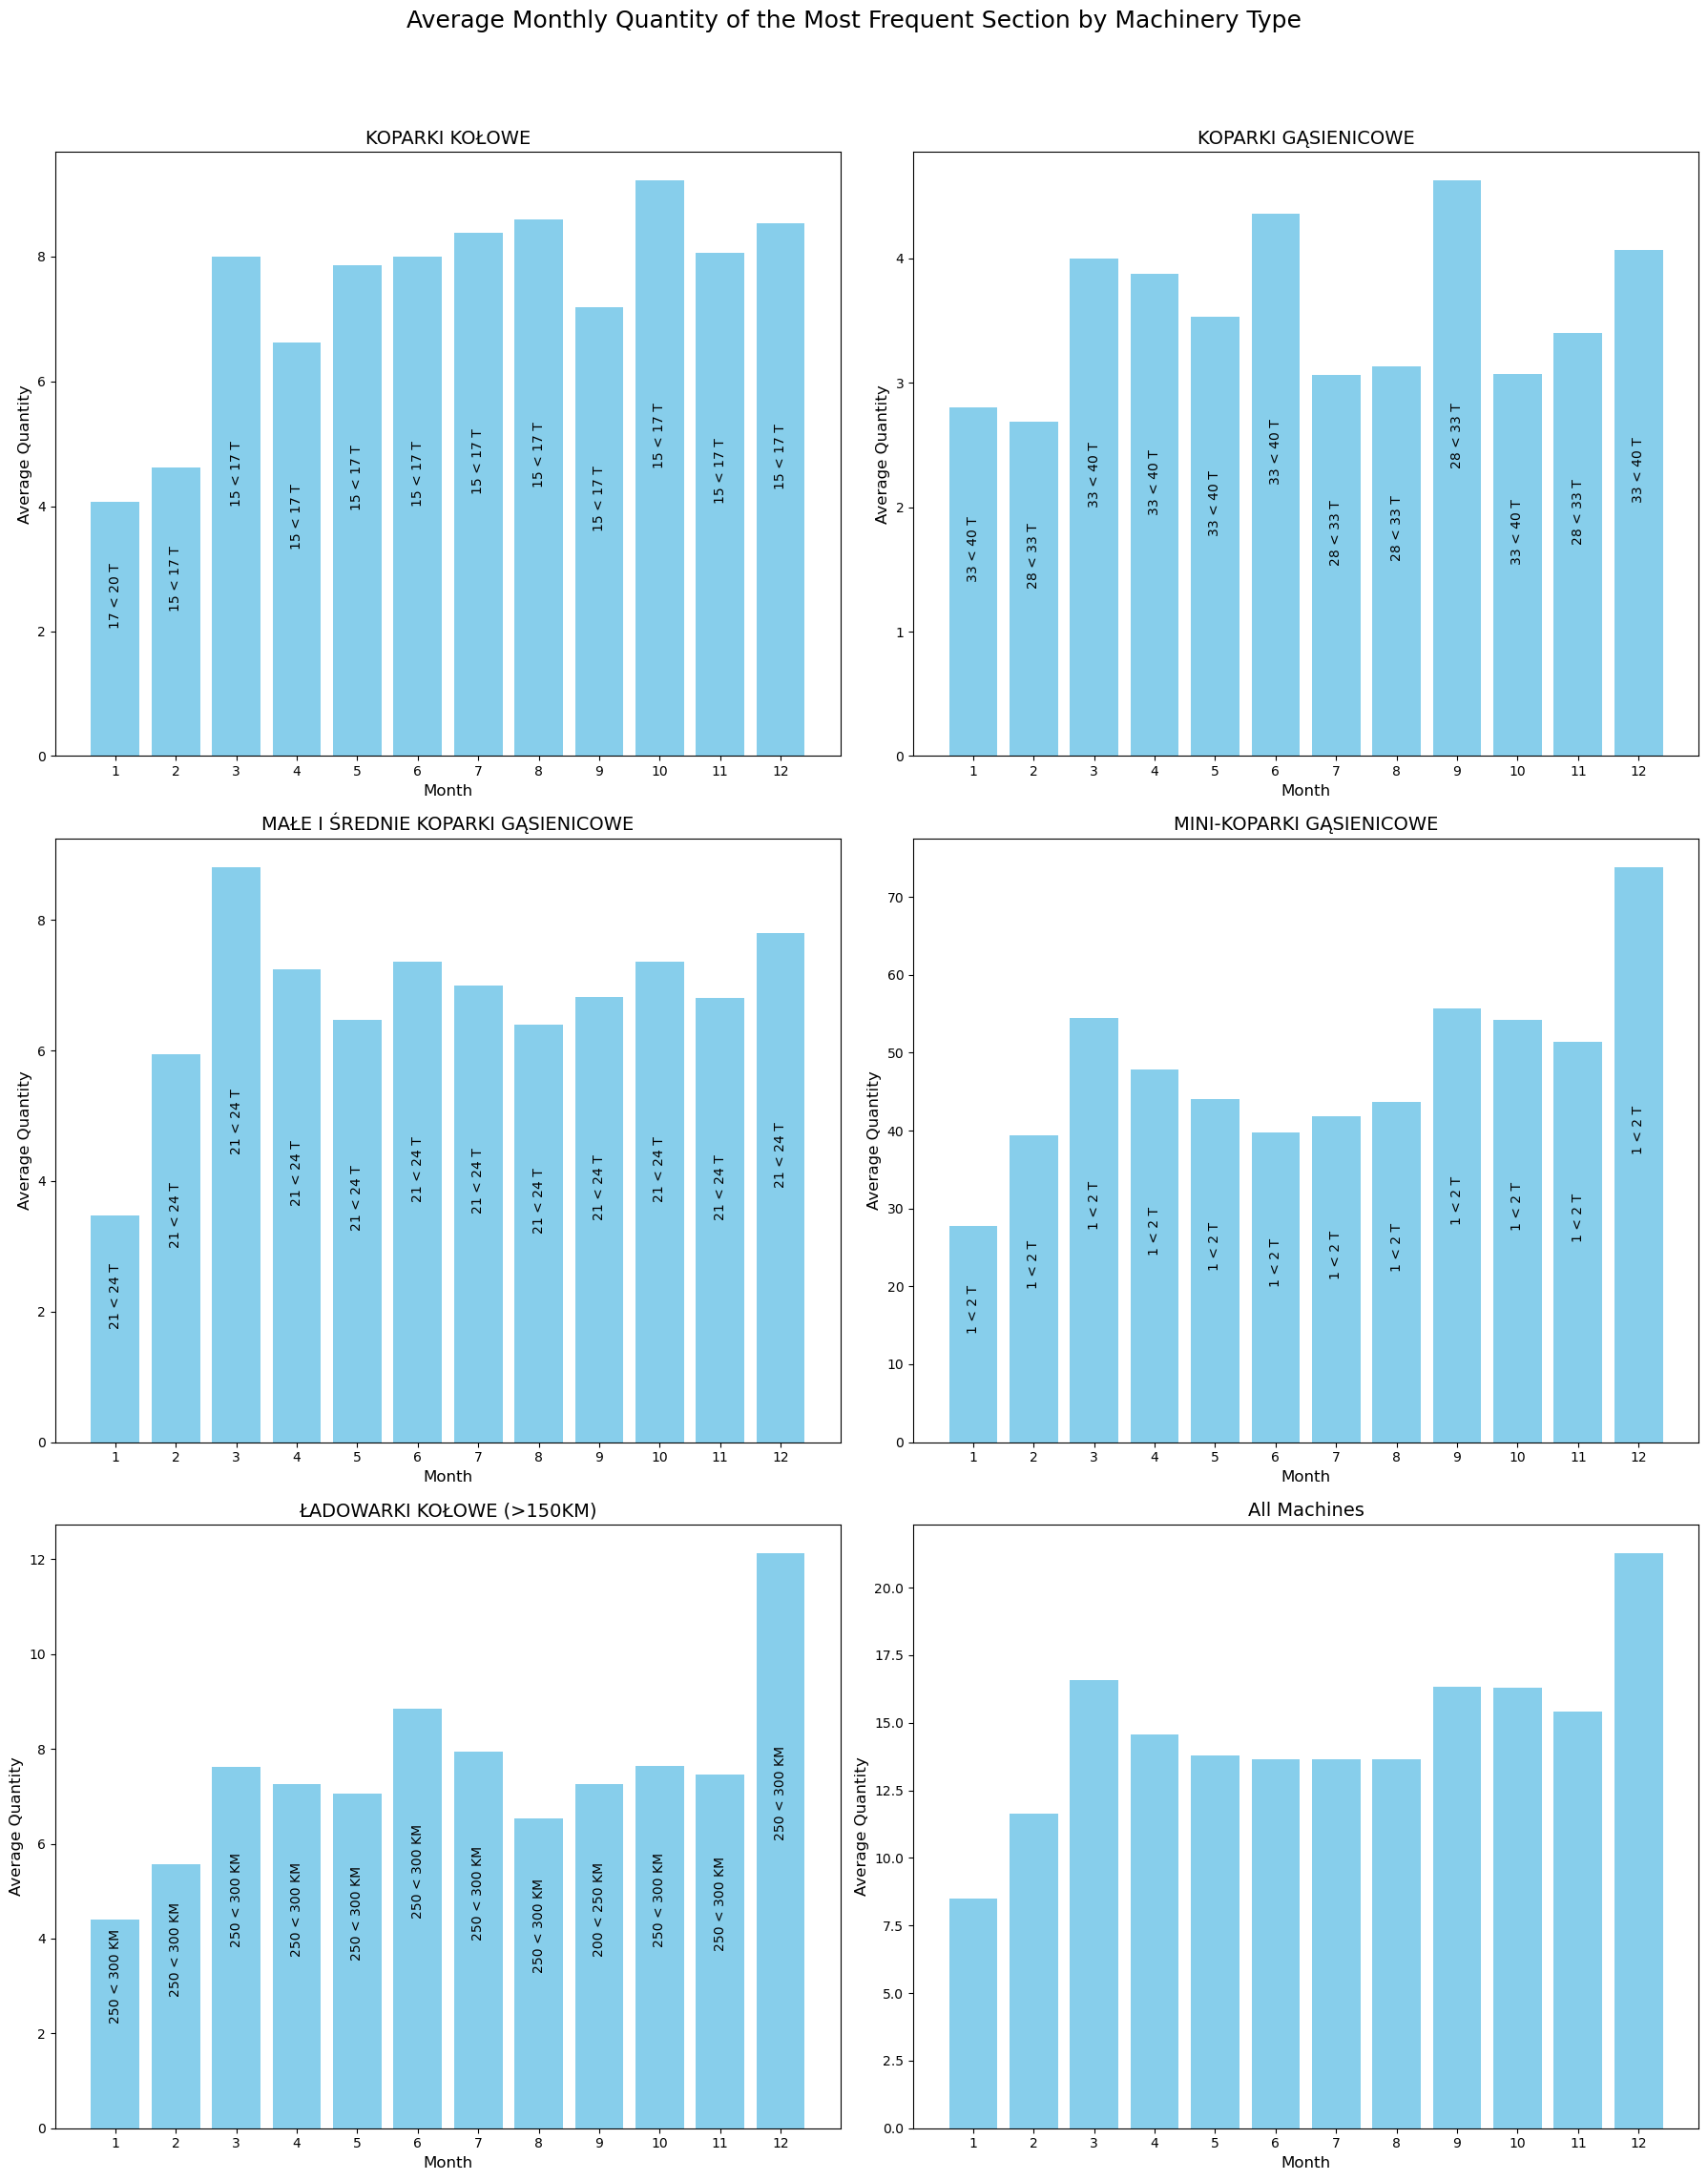

In [32]:
import matplotlib.pyplot as plt

def most_frequent_section_average(df):
    
    # Group by 'month' and 'section' to find the total quantity and count of unique 'year' values
    monthly_data = df.groupby(['month', 'section']).agg(
        total_quantity=('quantity', 'sum'),
        unique_years=('year', lambda x: x.nunique())
    ).reset_index()

    # Calculate the average quantity per month per unique 'year' value for each 'section'
    monthly_data['average_quantity'] = monthly_data['total_quantity'] / monthly_data['unique_years']

    # Find the section with the highest average quantity per month
    return monthly_data.loc[monthly_data.groupby('month')['average_quantity'].idxmax()]

# List of all dataframes and their titles for plotting
df_list = [kolowe_df, gasinicowe_df, midi_df, mini_df, ladowarki_df]
titles = ["KOPARKI KOŁOWE", "KOPARKI GĄSIENICOWE", "MAŁE I ŚREDNIE KOPARKI GĄSIENICOWE", "MINI-KOPARKI GĄSIENICOWE", "ŁADOWARKI KOŁOWE (>150KM)"]

# Calculate for each type of machinery
calculated_data = [most_frequent_section_average(df) for df in df_list]

# Calculate for each type of machinery
gasinicowe_monthly = most_frequent_section_average(gasinicowe_df)
midi_monthly = most_frequent_section_average(midi_df)
mini_monthly = most_frequent_section_average(mini_df)
ladowarki_monthly = most_frequent_section_average(ladowarki_df)

# Additional step: Calculate the combined average for all machinery types for each month
all_machines_monthly = pd.concat([most_frequent_section_average(df) for df in df_list])
all_machines_combined = all_machines_monthly.groupby('month').agg({'average_quantity': 'mean'}).reset_index()

# Adding the combined data and title to our lists
calculated_data.append(all_machines_combined)
titles.append("All Machines")

# Fix: Ensure the subplot configuration matches the length of calculated_data
num_plots = len(calculated_data)
nrows = (num_plots + 1) // 2  # Adjust the number of rows to accommodate all plots


# Adjust the plotting to include the new "all machines" data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 24), squeeze=False)
fig.suptitle('Average Monthly Quantity of the Most Frequent Section by Machinery Type', fontsize=18)

# Plotting with annotations inside the bars
for i, (data, title) in enumerate(zip(calculated_data, titles)):
    ax = axes.flatten()[i]
    bars = ax.bar(data['month'], data['average_quantity'], color='skyblue')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Average Quantity', fontsize=12)
    ax.set_xticks(range(1, 13))  # Adjust if necessary for your dataset
    
    # Check if 'section' exists and annotate sections inside the bars
    for bar, (_, row) in zip(bars, data.iterrows()):
        height = bar.get_height()
        section_text = row['section'] if 'section' in row else ''  # Check for 'section' key
        ax.text(bar.get_x() + bar.get_width() / 2., height * 0.5, section_text,
                ha='center', va='bottom', rotation=90, color='black', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


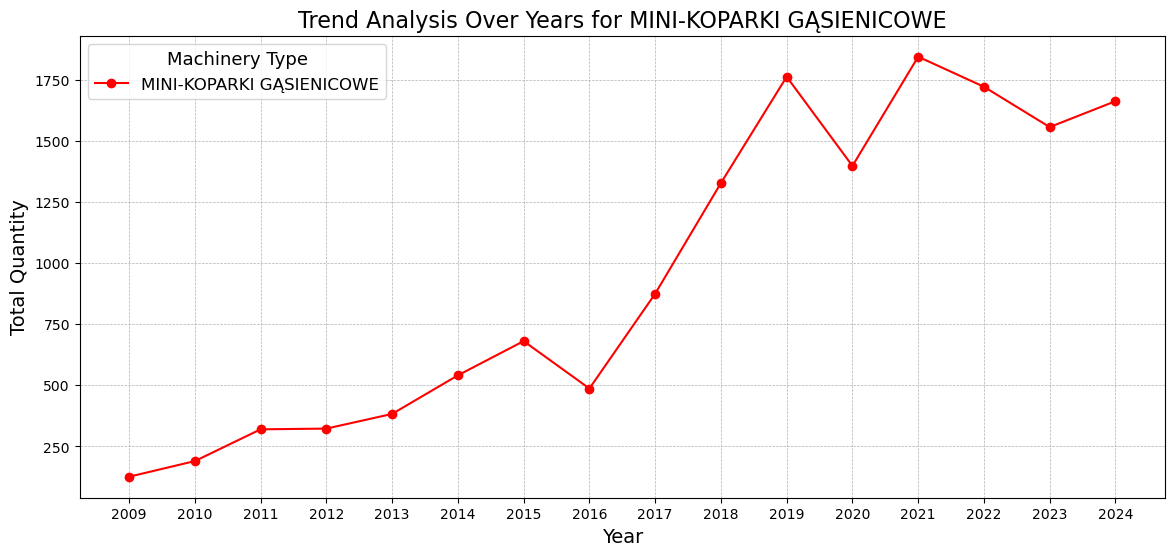

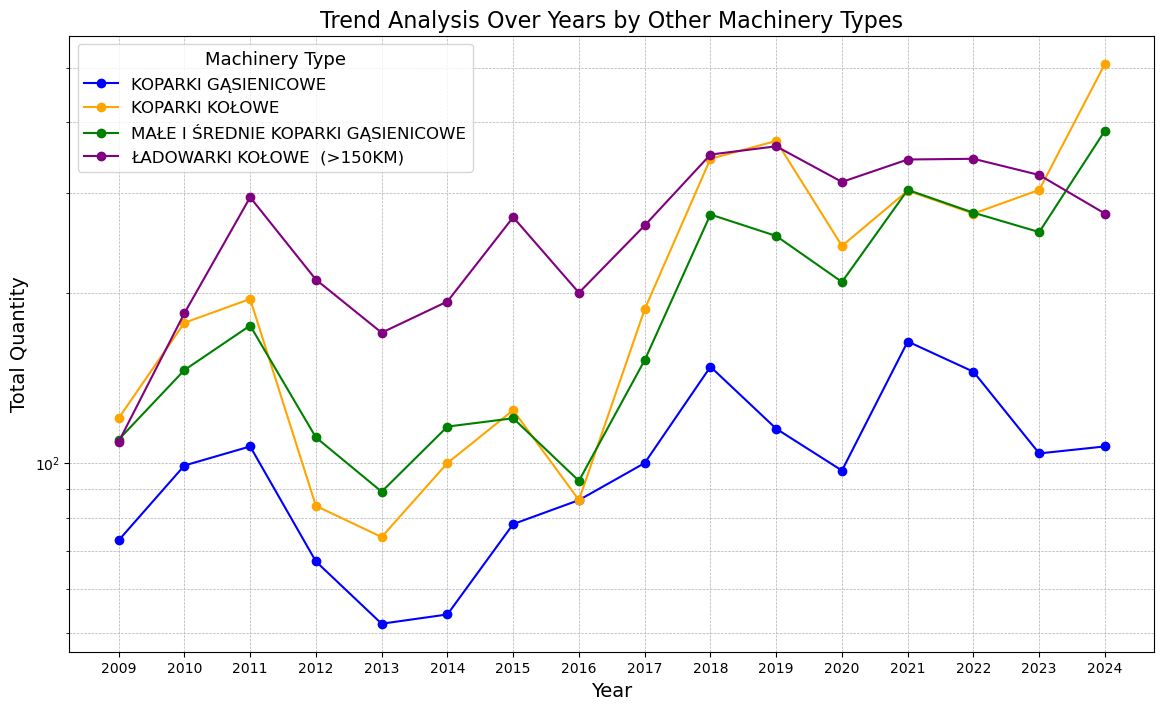

In [33]:
import matplotlib.pyplot as plt

# To perform a trend analysis over the years, we need to aggregate the quantity by year and type
trend_analysis = df.groupby(['year', 'type'])['quantity'].sum().reset_index()

# Separate plots for 'MINI-KOPARKI GĄSIENICOWE' and other machinery types
mini_koparki = trend_analysis[trend_analysis['type'] == 'MINI-KOPARKI GĄSIENICOWE']
others = trend_analysis[trend_analysis['type'] != 'MINI-KOPARKI GĄSIENICOWE']

# Plotting 'MINI-KOPARKI GĄSIENICOWE'
plt.figure(figsize=(14, 6))
plt.plot(mini_koparki['year'], mini_koparki['quantity'], label='MINI-KOPARKI GĄSIENICOWE', color='red', marker='o')
plt.title('Trend Analysis Over Years for MINI-KOPARKI GĄSIENICOWE', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.legend(title='Machinery Type', title_fontsize='13', fontsize='12')
plt.xticks(mini_koparki['year'].unique())
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plotting other machinery types with rescaled y-axis for easier reading
plt.figure(figsize=(14, 8))
types = others['type'].unique()
colors = ['blue', 'orange', 'green', 'purple']  # Adjusted color list for remaining types

for type, color in zip(types, colors):
    subset = others[others['type'] == type]
    plt.plot(subset['year'], subset['quantity'], label=type, color=color, marker='o')

plt.title('Trend Analysis Over Years by Other Machinery Types', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.legend(title='Machinery Type', title_fontsize='13', fontsize='12')
plt.xticks(others['year'].unique())
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Optional: adjust y-axis scale if necessary to improve readability
plt.yscale('log')  # For example, using a logarithmic scale
plt.show()


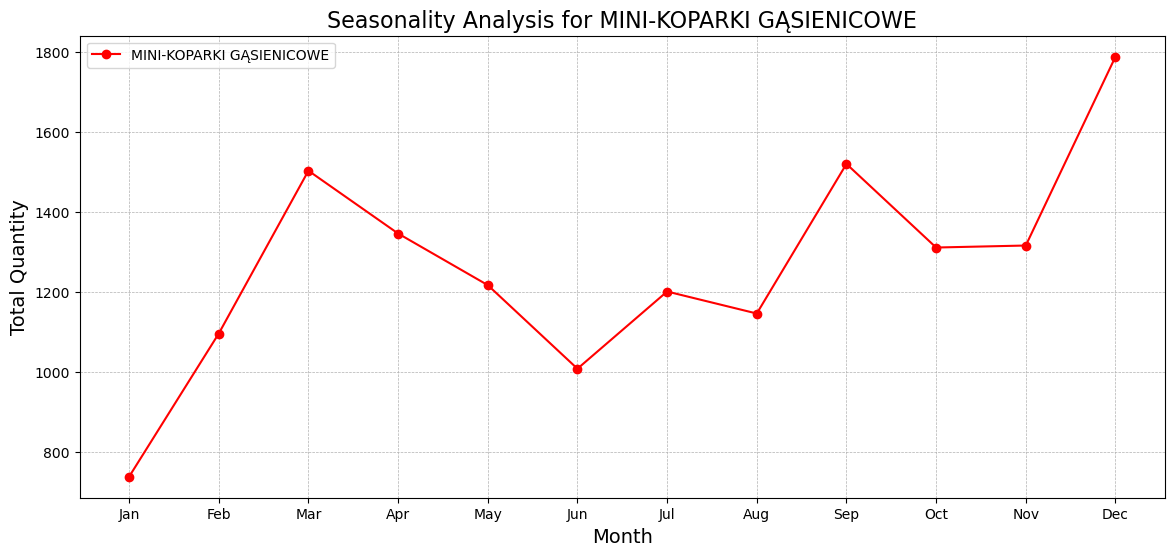

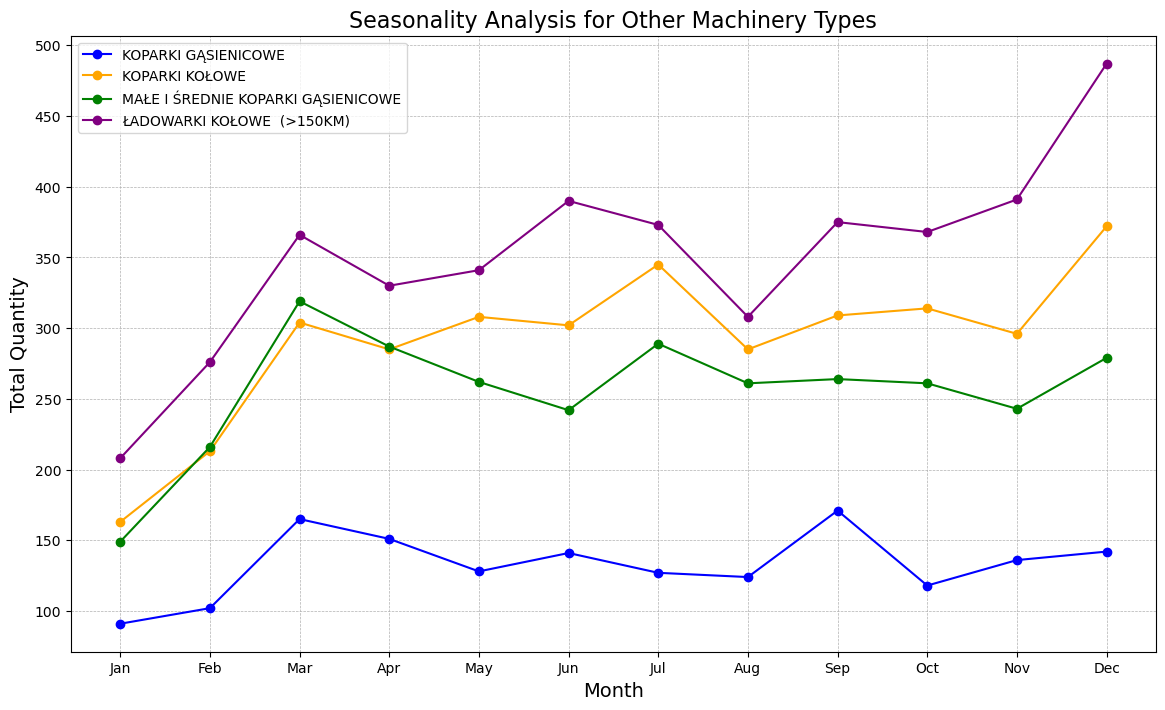

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the necessary data

# Perform seasonality analysis, aggregating quantity by month and type
seasonality_analysis = df.groupby(['month', 'type'])['quantity'].sum().reset_index()

# Define unique machinery types and assign colors for consistency in plotting
types = seasonality_analysis['type'].unique()
colors = ['blue', 'orange', 'green', 'red', 'purple']  # Adjust colors as needed for the number of types

# Separate the data for "MINI-KOPARKI GĄSIENICOWE"
mini_koparki_data = seasonality_analysis[seasonality_analysis['type'] == 'MINI-KOPARKI GĄSIENICOWE']
# Data for all other types except "MINI-KOPARKI GĄSIENICOWE"
other_machinery_data = seasonality_analysis[seasonality_analysis['type'] != 'MINI-KOPARKI GĄSIENICOWE']

# Plotting "MINI-KOPARKI GĄSIENICOWE"
plt.figure(figsize=(14, 6))
plt.plot(mini_koparki_data['month'], mini_koparki_data['quantity'], label='MINI-KOPARKI GĄSIENICOWE', color='red', marker='o')
plt.title('Seasonality Analysis for MINI-KOPARKI GĄSIENICOWE', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plotting other machinery types with a second plot
plt.figure(figsize=(14, 8))
for type, color in zip(types, colors):
    if type != 'MINI-KOPARKI GĄSIENICOWE':  # Skip "MINI-KOPARKI GĄSIENICOWE"
        subset = other_machinery_data[other_machinery_data['type'] == type]
        plt.plot(subset['month'], subset['quantity'], label=type, color=color, marker='o')

plt.title('Seasonality Analysis for Other Machinery Types', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# Part V. Preparing for PowerBI

In [6]:
import pandas as pd

# Load the Excel file
file_path = 'clean_df.xlsx'
data = pd.read_excel(file_path)

# Create months_df
months_df = pd.DataFrame({
    'month_id': range(1, 13),
    'month': [f"{i:02d}" for i in range(1, 13)]
})

# Create years_df
years_df = pd.DataFrame({
    'year_id': range(1, len(data['year'].unique()) + 1),
    'year': sorted(data['year'].unique())
})

# Create type_section_df with combined 'type' and 'section' into one column
type_section_df = pd.DataFrame({
    'type_section': (data['type'] + ' ' + data['section']).drop_duplicates().reset_index(drop=True)
})

# Create voivodeship_df
voivodeship_df = pd.DataFrame({
    'voivodeship_id': range(1, len(data['voivodeship'].unique()) + 1),
    'voivodeship': sorted(data['voivodeship'].unique())
})

# Save DataFrames to Excel files
months_df.to_excel('months_df.xlsx', index=False)
years_df.to_excel('years_df.xlsx', index=False)
type_section_df.to_excel('type_section_df.xlsx', index=False)
voivodeship_df.to_excel('voivodeship_df.xlsx', index=False)

print("DataFrames have been saved to Excel files.")

DataFrames have been saved to Excel files.


In [7]:
# # Clean column names by removing any leading/trailing spaces and replacing spaces with underscores
# data.columns = [col.strip().replace(" ", "_").replace("<", "to").lower() for col in data.columns]

# # Normalize text data by removing new lines and extra spaces in the 'hyundai' column
# data['hyundai'] = data['hyundai'].str.replace('\n', ' ', regex=True).str.strip()

# # Let's check the cleaned data columns and a sample of cleaned data to ensure it looks correct
# data.info(), data.head()


In [8]:
# Create a new column combining year and month into a full date format (first day of each month)
data['full_date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str) + '-01')

# Display the data to confirm the new column addition
data.head()


,year,month,voivodeship,type,section,Hyundai,quantity,full_date
0,2009,2,DOLNOŚLĄSKIE,KOPARKI GĄSIENICOWE,28 < 33 T,R 290LC-7\n R 290NLC-7\n R 290LC-7HC\n R 290LC...,0,2009-02-01
1,2009,2,DOLNOŚLĄSKIE,KOPARKI GĄSIENICOWE,33 < 40 T,R 360LC-7,0,2009-02-01
2,2009,2,DOLNOŚLĄSKIE,KOPARKI GĄSIENICOWE,40 < 50 T,R 450LC-7A\n\n R 450-7A\n\n R 500LC-7A,0,2009-02-01
3,2009,2,DOLNOŚLĄSKIE,KOPARKI GĄSIENICOWE,50 < 66 T,Other,1,2009-02-01
4,2009,2,DOLNOŚLĄSKIE,KOPARKI GĄSIENICOWE,66 < 90 T,Other,0,2009-02-01


In [9]:
# # Save the cleaned and modified data to a new Excel file
# output_file_path = 'bi_df.xlsx'
# data.to_excel(output_file_path, index=False)

# output_file_path


'bi_df.xlsx'

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_excel('clean_df.xlsx')

# Encode categorical variables
le_voivodeship = LabelEncoder()
le_type = LabelEncoder()
le_section = LabelEncoder()

df['voivodeship_encoded'] = le_voivodeship.fit_transform(df['voivodeship'])
df['type_encoded'] = le_type.fit_transform(df['type'])
df['section_encoded'] = le_section.fit_transform(df['section'])

# Prepare features and target
X = df[['year', 'month', 'voivodeship_encoded', 'type_encoded', 'section_encoded']]
y = df['quantity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Create a function to predict for specific dates
def predict_sales(year, month):
    # Get unique combinations of type and section from the original dataset
    type_section_combinations = df[['type', 'section']].drop_duplicates()
    
    predictions = []
    
    for voivodeship in df['voivodeship'].unique():
        for _, row in type_section_combinations.iterrows():
            machine_type = row['type']
            section = row['section']
            
            X_pred = pd.DataFrame({
                'year': [year],
                'month': [month],
                'voivodeship_encoded': [le_voivodeship.transform([voivodeship])[0]],
                'type_encoded': [le_type.transform([machine_type])[0]],
                'section_encoded': [le_section.transform([section])[0]]
            })
            
            prediction = model.predict(X_pred)[0]
            
            # Round the prediction to the nearest integer and only include positive predictions
            rounded_prediction = round(prediction)
            if rounded_prediction > 0:
                predictions.append({
                    'year': year,
                    'month': month,
                    'voivodeship': voivodeship,
                    'type': machine_type,
                    'section': section,
                    'predicted_quantity': rounded_prediction
                })
    
    return pd.DataFrame(predictions)

# Predict for the specified months
prediction_dates = [
    (2024, 10), (2024, 11), 
    (2024, 12), (2025, 1), (2025, 2), (2025, 3), 
    (2025, 4), (2025, 5), (2025, 6), (2025, 7), 
    (2025, 8), (2025, 9), (2025, 10), (2025, 11), (2025, 12)
]

all_predictions = pd.DataFrame()

for year, month in prediction_dates:
    predictions = predict_sales(year, month)
    all_predictions = pd.concat([all_predictions, predictions])

# Save predictions to Excel
all_predictions.to_excel('sales_predictions_2024_2025_integer.xlsx', index=False)
print("Predictions saved to 'sales_predictions_2024_2025_integer.xlsx'")

Mean Squared Error: 0.5886742429417121
R-squared Score: 0.4959460462666202
Predictions saved to 'sales_predictions_2024_2025_integer.xlsx'
